In [1]:
import numpy as np

import jax
import jax.numpy as jnp

from utils import multimodal_random_generator, plot_features

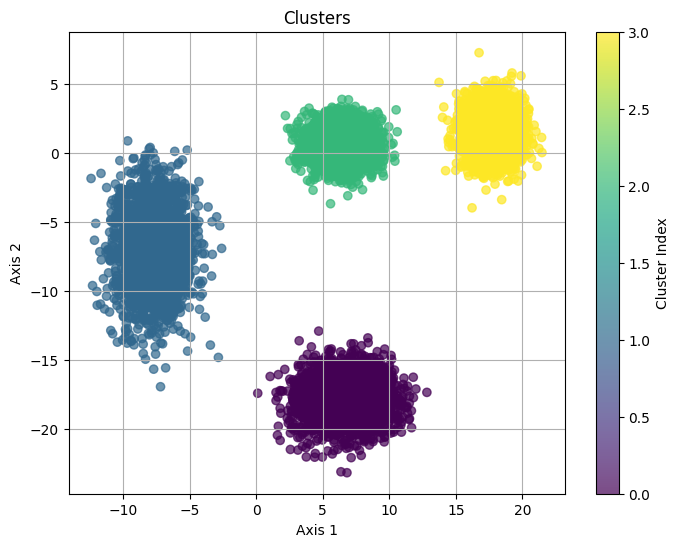

In [8]:
# Generate multimodal data
key = jax.random.PRNGKey(100)
n_samples = 10000
n_features = 2
n_modes = 4  # Number of clusters

random_arr, cluster_means, cluster_assignments = multimodal_random_generator(
    key, shape=(n_samples, n_features), n_modes=n_modes, minval=1, maxval=20
)
# random_arr = (random_arr - random_arr.mean(axis=0))/(random_arr.std(axis=0))
# Visualize
plot_features(random_arr, clusters=cluster_assignments)

# Test

In [9]:
import jax
import jax.numpy as jnp
from kmeans import KMeans
from utils import plot_centroid_trajectory

In [10]:
kmeans = KMeans(
    random_arr, n_clusters=n_modes, centroids=None, max_iter=200, seed=42
)

In [11]:
cluster_means

Array([[  6.7093296 , -17.881071  ],
       [ -7.695509  ,  -7.0181975 ],
       [  6.413604  ,   0.60845613],
       [ 17.679016  ,   1.6039907 ]], dtype=float32)

Epoch 0: distance = 14.5260
Epoch 10: distance = 14.9537
Epoch 20: distance = 14.9539
Epoch 30: distance = 14.9539
Epoch 40: distance = 14.9539
Epoch 50: distance = 14.9539
Epoch 60: distance = 14.9539
Epoch 70: distance = 14.9539
Epoch 80: distance = 14.9539
Epoch 90: distance = 14.9539
Epoch 100: distance = 14.9539
Epoch 110: distance = 14.9539
Epoch 120: distance = 14.9539
Epoch 130: distance = 14.9539
Epoch 140: distance = 14.9539
Epoch 150: distance = 14.9539
Epoch 160: distance = 14.9539
Epoch 170: distance = 14.9539
Epoch 180: distance = 14.9539
Epoch 190: distance = 14.9539


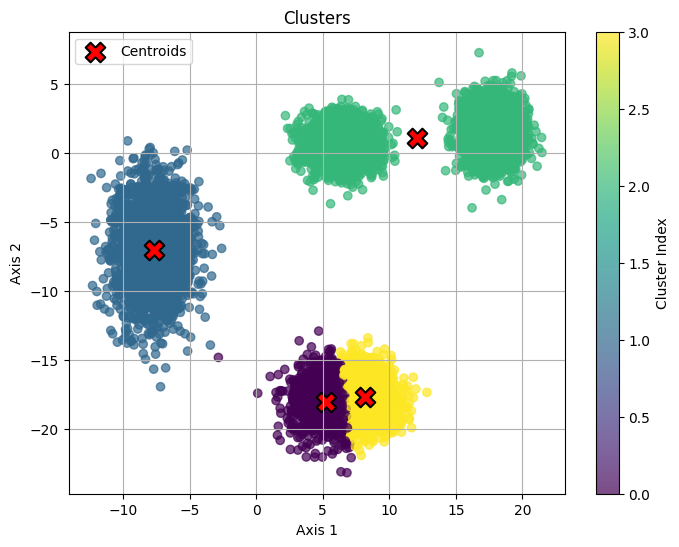

In [12]:
centroids, assignments, distance, centroids_history, assignment_history = kmeans.fit(
    verbose=True, track_history=True
)
plot_features(random_arr, clusters=assignments, centroids=centroids)

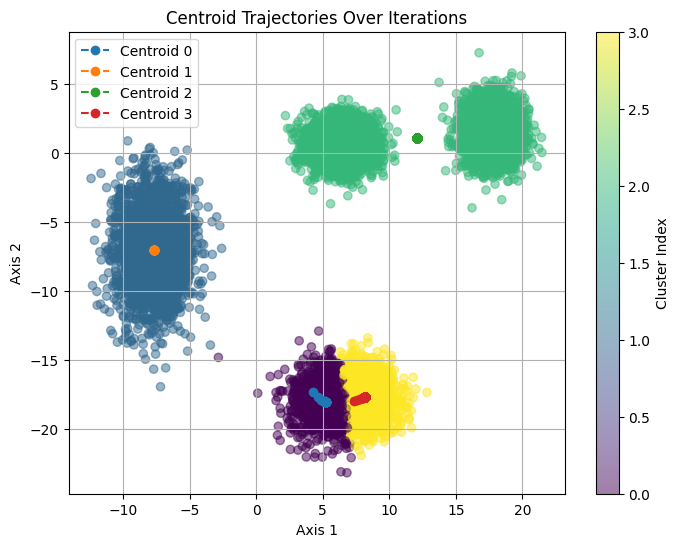

In [13]:
plot_centroid_trajectory(centroids_history=centroids_history, data=random_arr, clusters=assignments)

In [31]:
%%timeit
centroids, assignments, distance = kmeans.fit(
    verbose=False, track_history=False
)


12.7 ms ± 352 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [29]:
from sklearn.cluster import KMeans
kmeans_sklearn = KMeans(n_clusters=n_modes, init='random')

In [32]:
%%timeit
kmean_sklearn_y = kmeans_sklearn.fit_transform(random_arr)

8.44 ms ± 299 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [33]:
kmean_sklearn_y = kmeans_sklearn.fit_transform(random_arr)
assignments_sklearn = kmean_sklearn_y.argmin(axis=1)
assignments_sklearn.shape

(1000,)

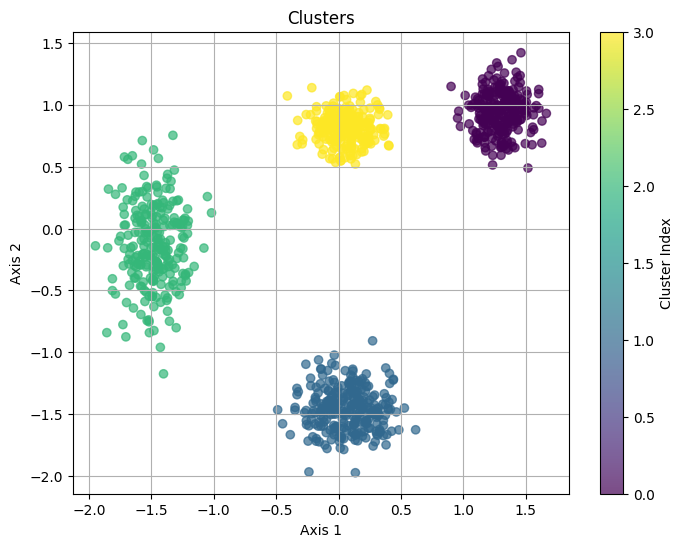

In [34]:
plot_features(random_arr, assignments_sklearn)

In [1]:
import numpy as np
A = np.array([1, 2, 3])
# print(log_softmax(A))

# Your code here
max_xi = np.max(A)
centered_xi = A-max_xi
log_softmax_val = centered_xi - np.log(np.sum(np.exp(centered_xi)))

log_softmax_val

array([-2.40760596, -1.40760596, -0.40760596])